In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy import stats

sns.set(style="whitegrid")


In [ ]:
# Replace the filename below with the exact name of your uploaded CSV
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset Loaded Successfully!
Shape: (9994, 11)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date'])
df = df.drop_duplicates(subset='Order ID')
df.shape


(4042, 11)

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("After IQR Cleaning:", df.shape)


After IQR Cleaning: (4013, 11)


In [ ]:
df.interpolate(method='linear', inplace=True)
df.fillna(method='bfill', inplace=True)
df.fillna(method='ffill', inplace=True)

print("✅ Missing values handled successfully!")


✅ Missing values handled successfully!


/tmp/ipython-input-3312836986.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
/tmp/ipython-input-3312836986.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
/tmp/ipython-input-3312836986.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
z = np.abs(stats.zscore(df[num_cols]))
df = df[(z < 3).all(axis=1)]

print("✅ Outlier removal done using Z-Score!")
print("Shape after outlier handling:", df.shape)


✅ Outlier removal done using Z-Score!
Shape after outlier handling: (4013, 11)


In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("✅ Label Encoding completed!")


✅ Label Encoding completed!


In [ ]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("✅ Min–Max Normalization completed!")


✅ Min–Max Normalization completed!


In [ ]:
df = df.sort_values('Order Date')
split_point = int(len(df) * 0.8)
train_df = df.iloc[:split_point]
test_df = df.iloc[split_point:]

print("✅ Chronological Split completed!")
print("Train Size:", train_df.shape)
print("Test Size:", test_df.shape)


✅ Chronological Split completed!
Train Size: (3210, 11)
Test Size: (803, 11)


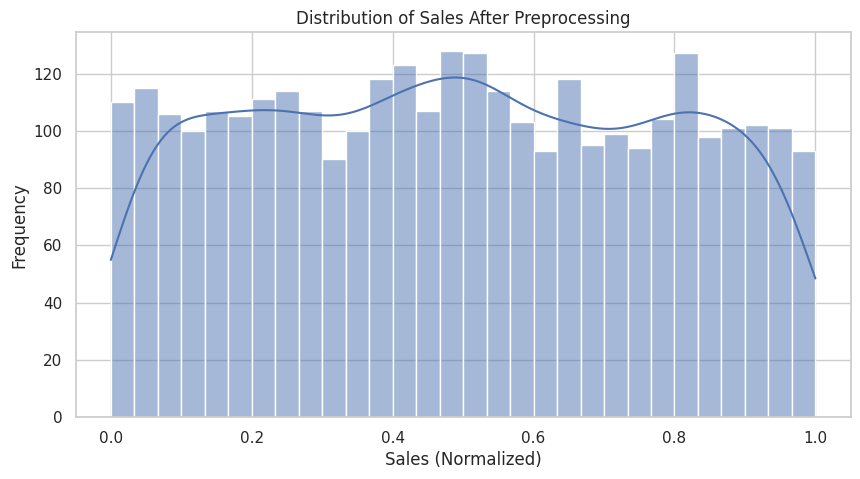

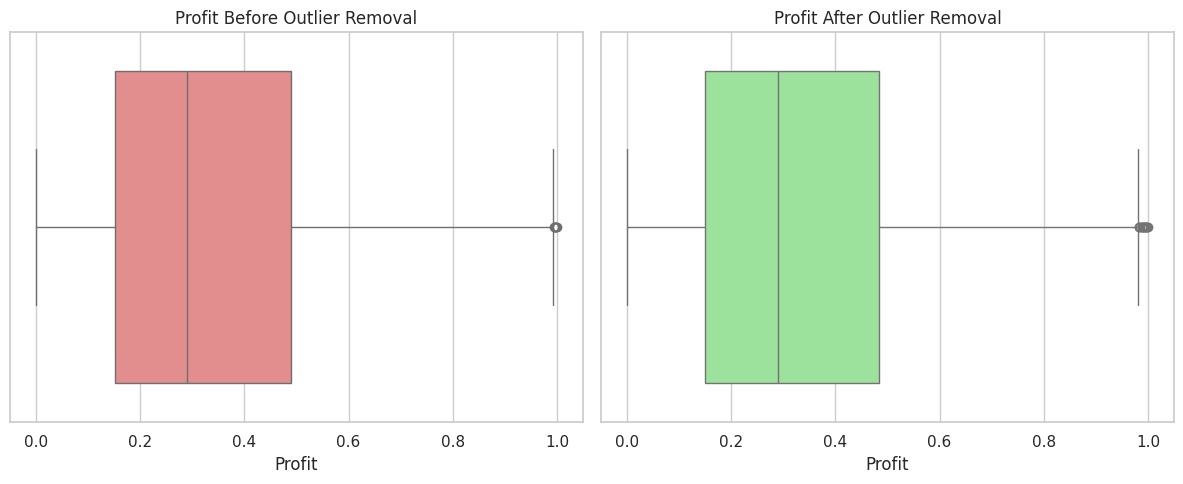

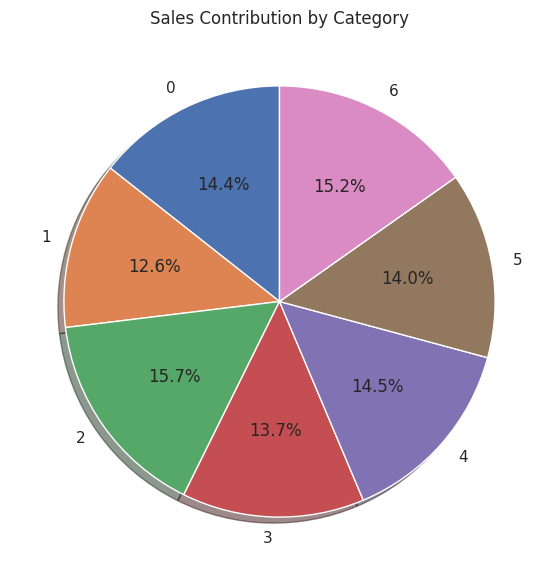

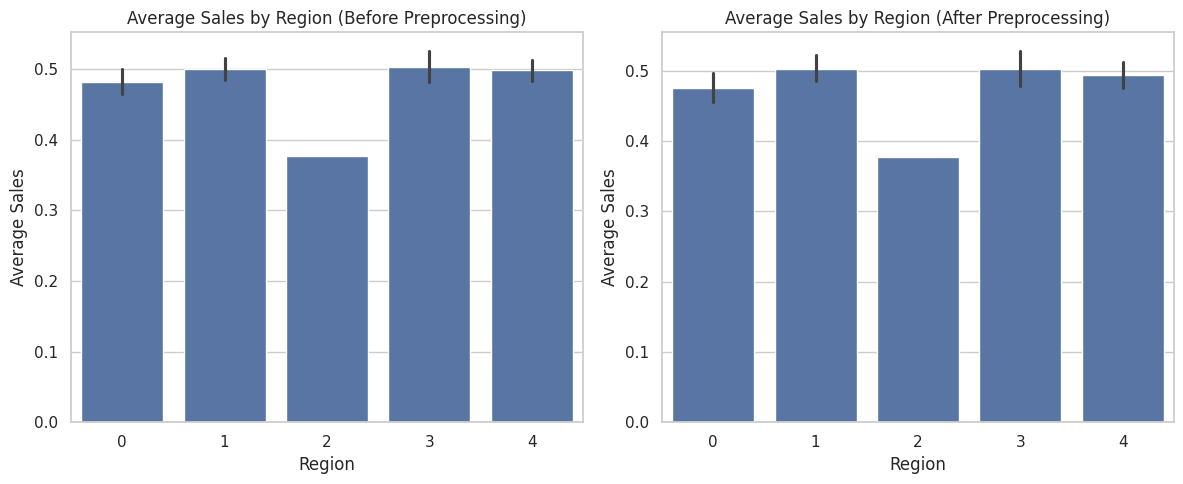

In [15]:
# 📊 Visualization: Before and After AutoPrep Preprocessing

# 1️⃣ Sales Distribution After Preprocessing
plt.figure(figsize=(10,5))
sns.histplot(train_df['Sales'], bins=30, kde=True)
plt.title("Distribution of Sales After Preprocessing")
plt.xlabel("Sales (Normalized)")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Profit Outlier Comparison (Before vs After)
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(x=df['Profit'], ax=axes[0], color='lightcoral')
axes[0].set_title("Profit Before Outlier Removal")
axes[0].set_xlabel("Profit")

sns.boxplot(x=train_df['Profit'], ax=axes[1], color='lightgreen')
axes[1].set_title("Profit After Outlier Removal")
axes[1].set_xlabel("Profit")

plt.tight_layout()
plt.show()

# 3️⃣ Sales Contribution by Category (Pie Chart)
plt.figure(figsize=(7,7))
category_sales = train_df.groupby('Category')['Sales'].sum()
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Sales Contribution by Category")
plt.show()

# 4️⃣ Average Sales by Region (Before & After Encoding)
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x='Region', y='Sales', data=df, ax=axes[0])
axes[0].set_title("Average Sales by Region (Before Preprocessing)")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Average Sales")

sns.barplot(x='Region', y='Sales', data=train_df, ax=axes[1])
axes[1].set_title("Average Sales by Region (After Preprocessing)")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Average Sales")

plt.tight_layout()
plt.show()
